<h1>PREPROCESSING<H1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
items = pd.read_csv('items.csv', sep='|')

In [3]:
items

,itemID,title,author,publisher,main topic,subtopics
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]"
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]"
...,...,...,...,...,...,...
78025,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,YFA,[YFJ]
78026,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,FMB,[]
78027,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,YFU,[]
78028,78130,The Everywhere Armchair,Ersila Bee,ELOQUENT BOOKS,YFC,"[YFG,YFH]"


In [4]:
items.describe()

,itemID
count,78030.000000
mean,39545.062553
std,22825.650252
min,0.000000
25%,19775.250000
50%,39561.500000
75%,59306.750000
max,79067.000000


<p> Pada tahap ini saya melakukan drop record buku yang memiliki judul sangat pendek, yaitu dengan total karakter kurang dari 4 karakter.<p>
<p>Hal ini saya lakukan karena pada tahap setelah ini saya akan melakukan language detector pada setiap judul buku. Namun judul buku yang terlalu pendek tidak akan bisa dideteksi bahasanya sehingga saya drop dari dataset.<p>

In [5]:
count = 0
item_counter = 0
i = 0
book_to_drop = []

while i < len(items):
    if (len(items['title'][i]) < 4):
        index = items[(items['itemID']==items['itemID'][i])].index
        book_to_drop.append([index, items['itemID'][i], items['title'][i]])
        item_counter = item_counter + 1
    count = count + 1
    i = i + 1

print('Terdapat ',len(book_to_drop),' judul buku yang memiliki judul terlalu pendek')

Terdapat  166  judul buku yang memiliki judul terlalu pendek


In [6]:
i = 0
while i < len(book_to_drop):
    items.drop(book_to_drop[i][0], inplace=True)
    i = i + 1

items

,itemID,title,author,publisher,main topic,subtopics
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]"
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]"
...,...,...,...,...,...,...
78025,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,YFA,[YFJ]
78026,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,FMB,[]
78027,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,YFU,[]
78028,78130,The Everywhere Armchair,Ersila Bee,ELOQUENT BOOKS,YFC,"[YFG,YFH]"


<p> Tahap selanjutnya saya melakukan language detection pada setiap judul buku. Pada tahap ini masih terdapat kemungkinan langdetect tidak dapat mendeteksi suatu bahasa dari suatu judul buku. Untuk buku yang tidak dapat dideteksi bahasanya akan dilabeli 'error' pada kolom language.<p>

In [7]:
from langdetect import detect
from langdetect import DetectorFactory

DetectorFactory.seed = 0

items['language'] = ''

listTitle = items['title']
languages = []

for text in listTitle:
    try:
        languages.append(detect(text))
        # print(text)
    except:
        #value akan ditulis 'error' saat langdetect tidak dapat mendeteksi bahasa dari judul
        language = 'error'
        languages.append(language)

items['language'] = languages

In [8]:
items.head()

,itemID,title,author,publisher,main topic,subtopics,language
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],en
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",de
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",en
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",de
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",de


<p>Drop record jika kolom language memiliki value 'error'<p>

In [9]:
items = items[items.language != 'error']
items.head()

,itemID,title,author,publisher,main topic,subtopics,language
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],en
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",de
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",en
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",de
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",de


<p>Save hasil language detection ke dalam file csv<p>

In [10]:
items.to_csv('items_language.csv')

In [80]:
items = pd.read_csv('items_language.csv')

In [81]:
items.isna().sum()

Unnamed: 0       0
itemID           0
title            0
author        3237
publisher        9
main topic     258
subtopics        1
language         0
dtype: int64

<p>Setelah saya lihat null valuenya, kolom author memiliki banyak sekali null value, sedangkan kolom publisher, main topic, dan subtopics, memiliki null value yang sangat sedikit. Untuk menjaga keberagaman data, saya hanya akan menghapus record null yang ada pada kolom publisher, main topic, dan subtopics. Sedangkan kolom author akan saya proses lebih lanjut.<p>

In [82]:
items = items[items['publisher'].notna()]
items = items[items['main topic'].notna()]
items = items[items['subtopics'].notna()]

In [83]:
items.head()

,Unnamed: 0,itemID,title,author,publisher,main topic,subtopics,language
0,0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],en
1,1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",de
2,2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",en
3,3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",de
4,4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",de


<p>Langkah selanjutnya saya akan melakukan processing terhadap kolom language, author dan main topic<p>
<p>Yang pertama saya lakukan processing adalah kolom language. saya lihat terlebih dahulu distribusi datanya.<p>

In [84]:
print('Terdapat ',len(items.language.unique()),' unique record pada kolom language')

Terdapat  31  unique record pada kolom language


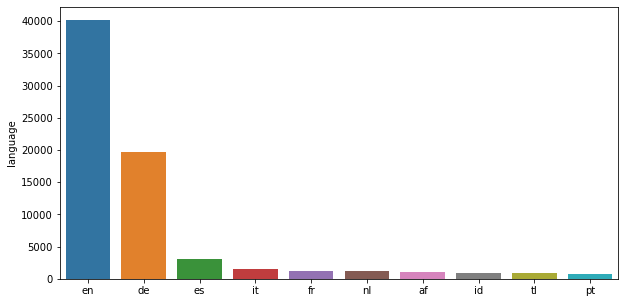

In [85]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=items['language'].value_counts()[:10].index, y=items.language.value_counts()[:10])
plt.savefig('language distribution.jpg')

<p>Dapat dilihat pada grafik diatas kalau language en dan de memiliki jumlah data yang sangat besar jika dibandingkan dengan language lain. Oleh karena itu saya hanya akan menyeleksi 5 language teratas dan menggantinya ke value aslinya, seperti 'en' menjadi 'english', 'de' menjadi 'german', 'es' menjadi 'spanish', 'it' menjadi 'italian', dan 'fr' menjadi 'french'. Selain 5 language teratas akan saya labeli 'otherlanguage'<p>

In [86]:
dicts = {'en' : 'english',
        'de' : 'german',
        'es' : 'spanish',
        'it' : 'italian',
        'fr' : 'french'}

items['language'] = items['language'].map(lambda x: dicts.get(x, 'otherlanguage'))

In [87]:
items.head()

,Unnamed: 0,itemID,title,author,publisher,main topic,subtopics,language
0,0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],english
1,1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",german
2,2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",english
3,3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",german
4,4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",german


<p>Selanjutnya saya akan memproses kolom main topic. Main topic pada kolom ini berbentuk kode yang terdiri dari 2-3 karakter. Berdasarkan link berikut: https://ns.editeur.org/thema/en , terdapat 20 topik utama yang berdasarkan pada karakter pertama, sedangkan sub-topik nya berdasarkan 2 karakter pertama, sub-sub-topik berdasarkan 3 karakter pertama, dan seterusnya. saya hanya akan memproses sampai sub-topik pertama dari setiap buku, yaitu sampai 2 karakter pertama. Hal ini saya lakukan untuk menghemat waktu.<p>

In [88]:
items['general_topic'] = items['main topic'].astype(str).str[0]
items['sub_topic'] = items['main topic'].astype(str).str[0:2]

In [89]:
items

,Unnamed: 0,itemID,title,author,publisher,main topic,subtopics,language,general_topic,sub_topic
0,0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],english,Y,YF
1,1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",german,A,AG
2,2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",english,Y,YF
3,3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",german,Y,YB
4,4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",german,W,WF
...,...,...,...,...,...,...,...,...,...,...
77820,78025,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,YFA,[YFJ],english,Y,YF
77821,78026,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,FMB,[],german,F,FM
77822,78027,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,YFU,[],english,Y,YF
77823,78028,78130,The Everywhere Armchair,Ersila Bee,ELOQUENT BOOKS,YFC,"[YFG,YFH]",english,Y,YF


In [90]:
subtopic2_dict = {'AB' : 'artsgeneral',
                  'AF' : 'artsform',
                  'AG' : 'artstreatment',
                  'AJ' : 'artsphotography',
                  'AK' : 'artsdesign',
                  'AM' : 'artsarchitecture',
                  'AT' : 'artsperforming',
                  'AV' : 'artsmusic',

                  'CF' : 'linguisticlanguage',
                  'CB' : 'linguisticgeneral',
                  'CJ' : 'linguisticteaching',

                  'DB' : 'literatureancient',
                  'DC' : 'literaturepoetry',
                  'DD' : 'literatureplayscripts',
                  'DN' : 'literaturebiography',
                  'DS' : 'literaturehistory',

                  'FB' : 'fictiongeneral',
                  'FC' : 'fictionbiography',
                  'FD' : 'fictionspeculative',
                  'FF' : 'fictioncrime',
                  'FG' : 'fictionsport',
                  'FH' : 'fictionthriller',
                  'FJ' : 'fictionadventure',
                  'FK' : 'fictionhorror',
                  'FL' : 'fictionscience',
                  'FM' : 'fictionfantasy',
                  'FN' : 'fictionmyth',
                  'FP' : 'fictionerotic',
                  'FQ' : 'fictionlifestyle',
                  'FR' : 'fictionromance',
                  'FS' : 'fictionfamily',
                  'FT' : 'fictionsaga',
                  'FU' : 'fictionhumour',
                  'FV' : 'fictionhistorical',
                  'FW' : 'fictionreligious',
                  'FX' : 'fictionnarrative',
                  'FY' : 'fictionspecial',
                  'FZ' : 'fictioncompanion',
                  
                  'GB' : 'referenceencyclopedia',
                  'GL' : 'referencelibrary',
                  'GP' : 'referenceresearch',
                  'GT' : 'referenceinterdisciplinary',
                  
                  'JB' : 'societyculture',
                  'JH' : 'societyanthropology',
                  'JK' : 'societywelfare',
                  'JM' : 'societypsychology',
                  'JN' : 'societyeducation',
                  'JP' : 'societypolitics',
                  'JW' : 'societywarfare',
                  
                  'KC' : 'economygeneral',
                  'KF' : 'economyfinance',
                  'KJ' : 'economybusiness',
                  'KN' : 'economyindustry',
                  
                  'LA' : 'lawjurisprudence',
                  'LB' : 'lawinternational',
                  'LN' : 'lawspecific',
                  'LW' : 'lawshariah',
                  'LX' : 'lawstudy',
                  
                  'MB' : 'medicinegeneral',
                  'MF' : 'medicinepreclinical',
                  'MJ' : 'medicineclinical',
                  'MK' : 'medicinespecialities',
                  'MN' : 'medicinesurgery',
                  'MQ' : 'medicinenursing',
                  'MR' : 'medicinestudy',
                  'MX' : 'medicinecomplementary',
                  'MZ' : 'medicineveterinary',
                  
                  'NH' : 'historygeneral',
                  'NK' : 'historyarchaelogy',
                  
                  'PB' : 'sciencemath',
                  'PD' : 'sciencegeneral',
                  'PG' : 'scienceastronomy',
                  'PH' : 'sciencephysics',
                  'PN' : 'sciencecehmistry',
                  'PS' : 'sciencebiology',
                  
                  'QD' : 'philosophygeneral',
                  'QR' : 'philosophyreligion',
                  
                  'RB' : 'geographyearth',
                  'RG' : 'geographygeneral',
                  'RN' : 'geographyenvironment',
                  'RP' : 'geographyregional',
                  
                  'SC' : 'sportsgeneral',
                  'SF' : 'sportsball',
                  'SH' : 'sportsathletic',
                  'SK' : 'sportsanimal',
                  'SM' : 'sportsvehicle',
                  'SP' : 'sportswater',
                  'SR' : 'sportscombat',
                  'ST' : 'sportswinter',
                  'SV' : 'sportsfield',
                  'SX' : 'sportsother',
                  'SZ' : 'sportsoutdoor',
                  
                  'TB' : 'technologygeneral',
                  'TC' : 'technologybiochemical',
                  'TD' : 'technologyindustrial',
                  'TG' : 'technologymechanical',
                  'TH' : 'technologyenergy',
                  'TJ' : 'technologyelectronics',
                  'TN' : 'technologycivil',
                  'TQ' : 'technologyenvironmental',
                  'TR' : 'technologytransport',
                  'TT' : 'technologyother',
                  'TV' : 'technologyagriculture',
                  
                  'UB' : 'computinggeneral',
                  'UD' : 'computinglifestyle',
                  'UF' : 'computingbusiness',
                  'UG' : 'computinggraphical',
                  'UK' : 'computinghardware',
                  'UL' : 'computingOS',
                  'UM' : 'computingprogramming',
                  'UN' : 'computingdatabase',
                  'UP' : 'computingpractical',
                  'UQ' : 'computingcertification',
                  'UR' : 'computingsecurity',
                  'UT' : 'computingnetworking',
                  'UX' : 'computingapplied',
                  'UY' : 'computingscience',
                  
                  'VF' : 'healthfamily',
                  'VS' : 'healthself',
                  'VX' : 'healthmind',
                  
                  'WB' : 'lifestylefood',
                  'WC' : 'lifestyleantique',
                  'WD' : 'lifestylehobby',
                  'WF' : 'lifestyledecoration',
                  'WG' : 'lifestyletransport',
                  'WH' : 'lifestylehumour',
                  'WJ' : 'lifestylefashion',
                  'WK' : 'lifestylehouse',
                  'WM' : 'lifestylegardening',
                  'WN' : 'lifestylenature',
                  'WQ' : 'lifestylehistory',
                  'WT' : 'lifestyletravel',
                  'WZ' : 'lifestylemiscellaneous',
                  
                  'XA' : 'comictype',
                  'XQ' : 'comicgenre',
                  'XR' : 'comicreview',
                  'XY' : 'comiccartoon',
                  
                  'YB' : 'childrenpicture',
                  'YD' : 'childrenpoetry',
                  'YF' : 'childrenfiction',
                  'YN' : 'childrengeneral',
                  'YP' : 'childreneducation',
                  'YR' : 'childrenreference',
                  'YX' : 'childrensocial',
                  'YZ' : 'childrenmiscellaneous'}
                  
maintopic_dict = {'A' : 'arts',
                  'C' : 'linguistic',
                  'D' : 'literature',
                  'F' : 'fiction',
                  'G' : 'reference',
                  'J' : 'society',
                  'K' : 'economy',
                  'L' : 'law',
                  'M' : 'medicine',
                  'N' : 'history',
                  'P' : 'science',
                  'Q' : 'philosophy',
                  'R' : 'geography',
                  'S' : 'sports',
                  'T' : 'technology',
                  'U' : 'computing',
                  'V' : 'health',
                  'W' : 'lifestyle',
                  'X' : 'comic',
                  'Y' : 'children'}
                  

In [91]:
items.replace({"sub_topic": subtopic2_dict}, inplace=True)

In [92]:
items.replace({"general_topic": maintopic_dict}, inplace=True)

In [93]:
items

,Unnamed: 0,itemID,title,author,publisher,main topic,subtopics,language,general_topic,sub_topic
0,0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],english,children,childrenfiction
1,1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",german,arts,artstreatment
2,2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",english,children,childrenfiction
3,3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",german,children,childrenpicture
4,4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",german,lifestyle,lifestyledecoration
...,...,...,...,...,...,...,...,...,...,...
77820,78025,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,YFA,[YFJ],english,children,childrenfiction
77821,78026,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,FMB,[],german,fiction,fictionfantasy
77822,78027,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,YFU,[],english,children,childrenfiction
77823,78028,78130,The Everywhere Armchair,Ersila Bee,ELOQUENT BOOKS,YFC,"[YFG,YFH]",english,children,childrenfiction


In [94]:
items.drop(['Unnamed: 0'], axis = 1, inplace=True)
items.drop(['main topic'], axis = 1, inplace=True)
items.drop(['subtopics'], axis = 1, inplace=True)

In [95]:
items

,itemID,title,author,publisher,language,general_topic,sub_topic
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,english,children,childrenfiction
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,german,arts,artstreatment
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,english,children,childrenfiction
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,german,children,childrenpicture
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,german,lifestyle,lifestyledecoration
...,...,...,...,...,...,...,...
77820,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,english,children,childrenfiction
77821,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,german,fiction,fictionfantasy
77822,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,english,children,childrenfiction
77823,78130,The Everywhere Armchair,Ersila Bee,ELOQUENT BOOKS,english,children,childrenfiction


<p>Terakhir yang saya lakukan adalah memproses kolom author. Pertama-tama saya lihat dulu ada berapa banyak unique value pada kolom author.<p>

In [96]:
print('Terdapat ',len(items.author.unique()),' unique value pada kolom author')

Terdapat  35765  unique value pada kolom author


<p>Selanjutnya saya akan melihat distribusi datanya dari 20 unique author teratas<p>

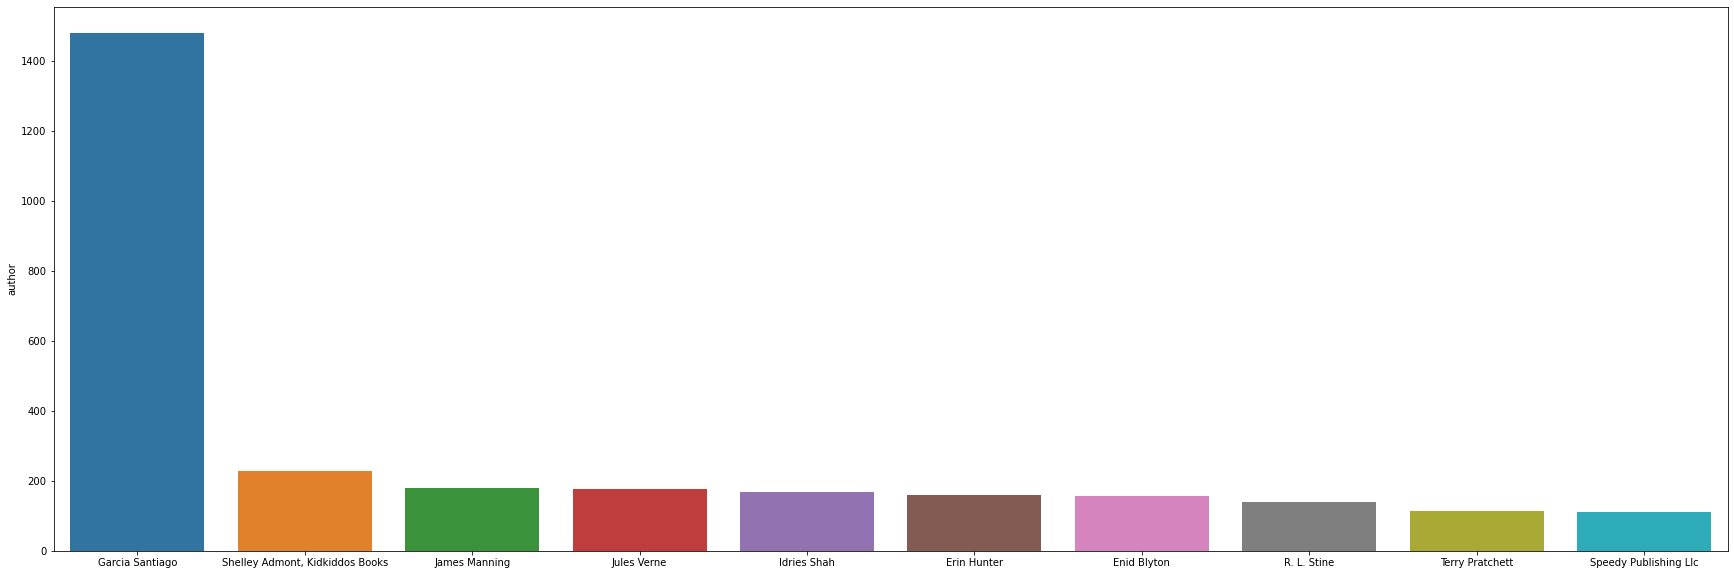

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.barplot(x=items['author'].value_counts()[:10].index, y=items.author.value_counts()[:10])
plt.savefig('author distribution.jpg')

<p>Dapat dilihat kalau distribusi data pada kolom author sangat merata, yaitu berada pada rentang 0-200 untuk setiap authornya, kecuali author 'Garcia Santiago' yang memiliki lebih dari 1400 data. Karena distribusi datanya yang sangat merata ini, saya tidak akan melakukan apapun terhadap kolom author kecuali melabeli value yang bernilai null dengan label 'otherauthor'.<p>

In [ ]:
items.fillna(value = 'otherauthor', inplace = True)

In [ ]:
items.isna().sum()

In [ ]:
items.head()

<p>Dengan ini preprocessing sudah selesai. Saatnya mengexport dataframe final ke dalam file csv<p>

In [ ]:
items.to_csv('items_final.csv')